In [1]:
# importing libraries
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
# create a won dataframe
df = pd.DataFrame()

df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot:xlabel='X1', ylabel='X2'>

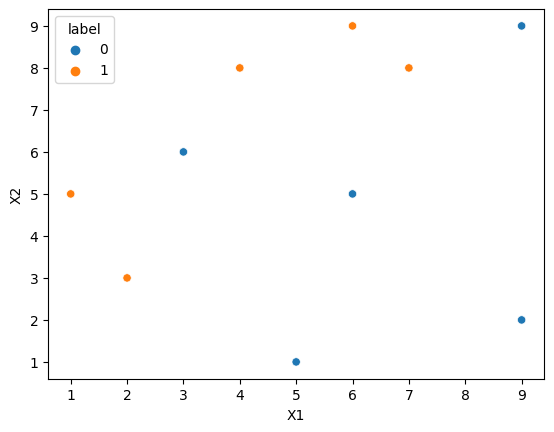

In [3]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])#essentially non linear data 

In [4]:
# let's assign weights for every row
df['weights'] = 1/df.shape[0]

In [5]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [6]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth=1) # max_depth = 1 beacuse we use dicision stump for AdaBoost

In [7]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [8]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

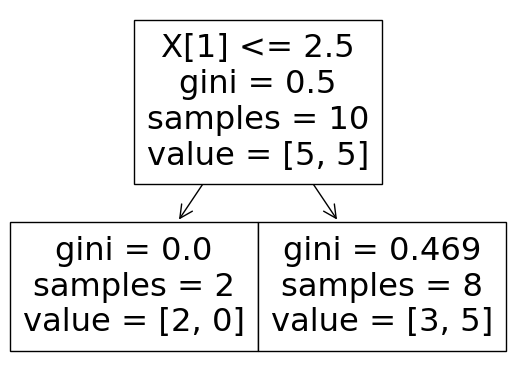

In [9]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<AxesSubplot:>

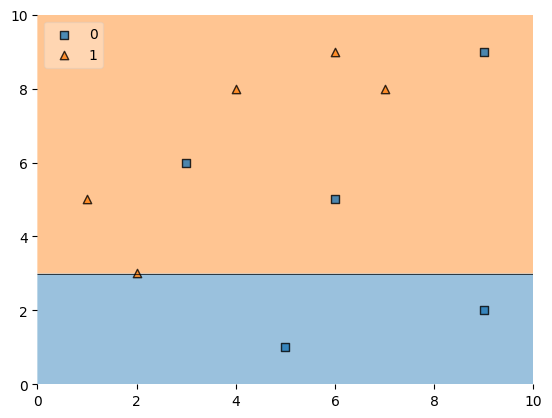

In [10]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [11]:
df['y_pred'] = dt1.predict(X)

In [12]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [13]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error)) # if error is 0 then 0.5*np.log((1-error)/(error+0.000000001))

In [14]:
# calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [15]:
# Update weights
def update_row_weights(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [16]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [17]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [18]:
df['updated_weights'].sum()

0.9165153319682015

In [19]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [20]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [21]:
df['nomalized_weights'].sum()

1.0

In [22]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights']) # upper range

In [23]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights'] # lower range

In [24]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [25]:
def create_new_dataset(df):

    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [26]:
index_values = create_new_dataset(df) # upsampling basically

index_values

[2, 6, 1, 4, 8, 9, 0, 5, 5, 6]

In [27]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [28]:
second_df

,X1,X2,label,weights
2,3,6,0,0.1
6,6,5,0,0.1
1,2,3,1,0.1
4,5,1,0,0.1
8,9,9,0,0.1
9,9,2,0,0.1
0,1,5,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
6,6,5,0,0.1


In [29]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [30]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [31]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 2.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]')]

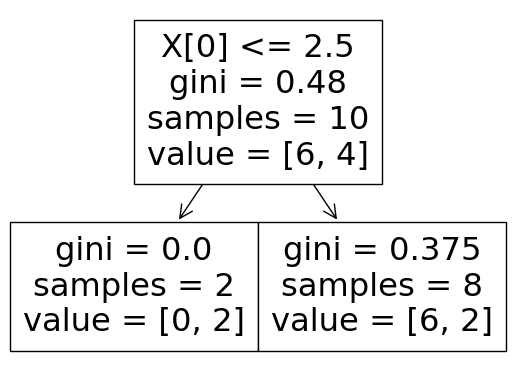

In [32]:
plot_tree(dt2)

<AxesSubplot:>

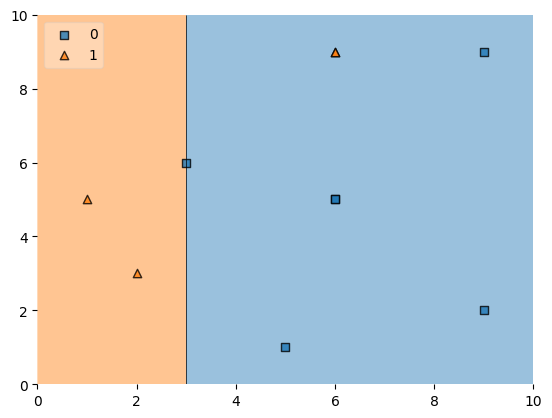

In [33]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [34]:
second_df['y_pred'] = dt2.predict(X)

In [35]:
second_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,0
6,6,5,0,0.1,0
1,2,3,1,0.1,1
4,5,1,0,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0
0,1,5,1,0.1,1
5,6,9,1,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0


In [36]:
alpha2 = calculate_model_weight(0.1)

In [37]:
alpha2

1.0986122886681098

In [38]:
# Update weights
def update_row_weights(row,alpha=1.09):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [39]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [40]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
2,3,6,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
1,2,3,1,0.1,1,0.033622
4,5,1,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
0,1,5,1,0.1,1,0.033622
5,6,9,1,0.1,0,0.297427
5,6,9,1,0.1,0,0.297427
6,6,5,0,0.1,0,0.033622


In [41]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [42]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
2,3,6,0,0.1,0,0.033622,0.038922
6,6,5,0,0.1,0,0.033622,0.038922
1,2,3,1,0.1,1,0.033622,0.038922
4,5,1,0,0.1,0,0.033622,0.038922
8,9,9,0,0.1,0,0.033622,0.038922
9,9,2,0,0.1,0,0.033622,0.038922
0,1,5,1,0.1,1,0.033622,0.038922
5,6,9,1,0.1,0,0.297427,0.344313
5,6,9,1,0.1,0,0.297427,0.344313
6,6,5,0,0.1,0,0.033622,0.038922


In [43]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [44]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [45]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [46]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
2,3,6,0,0.1,0,0.038922,0.000000,0.038922
6,6,5,0,0.1,0,0.038922,0.038922,0.077843
1,2,3,1,0.1,1,0.038922,0.077843,0.116765
4,5,1,0,0.1,0,0.038922,0.116765,0.155687
8,9,9,0,0.1,0,0.038922,0.155687,0.194608
9,9,2,0,0.1,0,0.038922,0.194608,0.233530
0,1,5,1,0.1,1,0.038922,0.233530,0.272452
5,6,9,1,0.1,0,0.344313,0.272452,0.616765
5,6,9,1,0.1,0,0.344313,0.616765,0.961078
6,6,5,0,0.1,0,0.038922,0.961078,1.000000


In [47]:
index_values = create_new_dataset(second_df)

In [48]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [49]:
third_df

,X1,X2,label,weights
9,9,2,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1


In [50]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<AxesSubplot:>

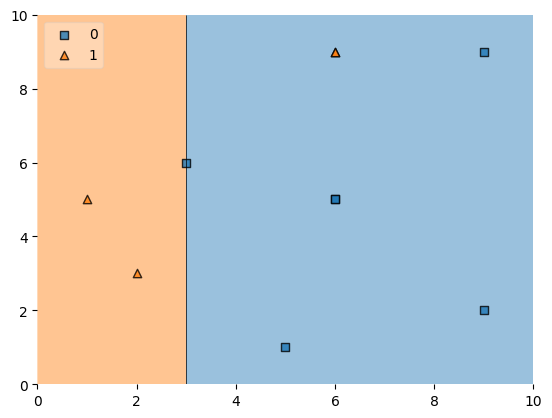

In [51]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [52]:
third_df['y_pred'] = dt3.predict(X)

In [53]:
third_df

,X1,X2,label,weights,y_pred
9,9,2,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,1
9,9,2,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,1
9,9,2,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0


In [66]:
alpha3 = calculate_model_weight(0.2)
alpha3

0.6931471805599453

In [67]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 0.6931471805599453


## Prediction

In [68]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [69]:
dt2.predict(query)

array([1], dtype=int64)

In [70]:
dt3.predict(query)

array([1], dtype=int64)

In [71]:
alpha1*1 + alpha2*(1) + alpha3*(1)

2.215408399421657

In [72]:
np.sign(2.21)

1.0

In [73]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [74]:
dt2.predict(query)

array([0], dtype=int64)

In [75]:
dt3.predict(query)

array([0], dtype=int64)

In [76]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-1.3681105390344532

In [77]:
np.sign(-1.36)

-1.0